### Classifying customers using K Neighbors Classifier

##### The dataset is of the telecommunication customers and is taken from Kaggle. The description of the dataset as per kaggle is -
##### The telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

##### The dataset includes information about: <br> Demographic info about customers – region, tenure, age, marital status, address, income, employ, gender, retire, reside. <br> Customer categorization on the basis of their other characteristic - given by the column custcat

##### Our target will be to classify the customers based on the features to the specific customer categorization zone. There are four zones of categorization - 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service. Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

### Import the libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tele.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


##### Counting the number of specific categorizations present

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

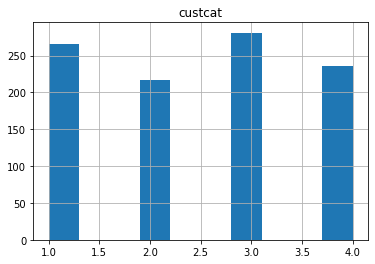

In [10]:
df.hist(column = 'custcat', bins=10);

### Separating the feature variables and the target variable

In [26]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
x

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [28]:
y = df['custcat'].values
y[:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalizing the data
##### Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points

In [30]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train and test dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Building the model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Let's build the model by taking 4 nearest neighbors at first
k=4
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [35]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [36]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


##### So, from above it can be seen that the accuracy score is much less for the unseen data than the trained data. So, let's try to build the model again with a different value of k

In [37]:
k = 6
neigh2 = KNeighborsClassifier(n_neighbors = k)
neigh2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [38]:
yhat2 = neigh2.predict(X_test)
yhat2[:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [39]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


##### So, from above it can be seen that the accuracy score is coming still less for the unseen data than the trained data, and also the score of train set has decreased as well. Thus, k=6 is definitey not better than k = 4. So, how can we choose right value for K? <br> The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model. <br> We can calculate the accuracy of KNN for different values of k.


In [61]:
k_range = 12

mean_acc = np.zeros((k_range-1))
std_acc = np.zeros((k_range-1))

for i in range(1, k_range):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i-1] = np.std (yhat==y_test) / np.sqrt(yhat.shape[0])

In [62]:
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315])

In [63]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


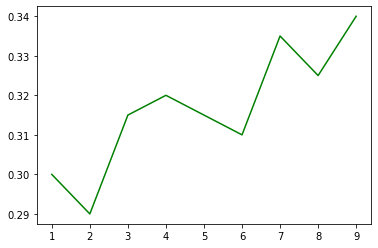

In [49]:
plt.plot(range(1,k_range), mean_acc, 'g');

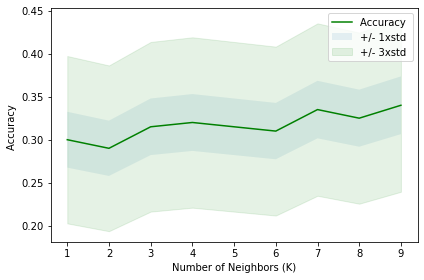

In [59]:
plt.plot(range(1,k_range), mean_acc, 'g')
plt.fill_between(range(1,k_range), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,k_range), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color = 'g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show();